In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.interpolate import interp1d

from SiPM import SiPMClass
from WaveformGenerator import WaveformClass
from NSB import NSBClass
from Shower import ShowerClass
import ROOT as root
import pickle

created SiPM class
created NSB class
created shower class
created waveform class
Welcome to JupyROOT 6.16/00


In [2]:
def load_object(file_name):
    try:
        with open(file_name, "rb") as f:
            data = pickle.load(f)
            return data
    except Exception as ex:
        print("Error during unpickling object (Possibly unsupported):", ex)

In [3]:
NUV_HD_25um_10p_data = load_object('/run/media/andrii/Новый том/Terzina_sim/sim_results/25um/850ns/NUVHD-25um_px_0.1_waveforms_data.pickle')
NUV_HD_25um_20p_data = load_object('/run/media/andrii/Новый том/Terzina_sim/sim_results/25um/850ns/NUVHD-25um_px_0.2_waveforms_data.pickle')
NUV_HD_25um_03p_LXT_data = load_object('/run/media/andrii/Новый том/Terzina_sim/sim_results/25um/850ns/NUVHD-25um-LXT_px_0.033_waveforms_data.pickle')
NUV_HD_25um_06p_LXT_data = load_object('/run/media/andrii/Новый том/Terzina_sim/sim_results/25um/850ns/NUVHD-25um-LXT_px_0.066_waveforms_data.pickle')
NUV_HD_25um_03p_MT_data = load_object('/run/media/andrii/Новый том/Terzina_sim/sim_results/25um/850ns/NUVHD-25um-MT_px_0.033_waveforms_data.pickle')
NUV_HD_25um_06p_MT_data = load_object('/run/media/andrii/Новый том/Terzina_sim/sim_results/25um/850ns/NUVHD-25um-MT_px_0.066_waveforms_data.pickle')

In [14]:
10.177+0.79

10.966999999999999

In [4]:
NUV_HD_35um_10p_data = load_object('/run/media/andrii/Новый том/Terzina_sim/sim_results/35um/850ns/NUVHD-35um_px_0.1_waveforms_data.pickle')
NUV_HD_35um_20p_data = load_object('/run/media/andrii/Новый том/Terzina_sim/sim_results/35um/850ns/NUVHD-35um_px_0.2_waveforms_data.pickle')
NUV_HD_35um_03p_LXT_data = load_object('/run/media/andrii/Новый том/Terzina_sim/sim_results/35um/850ns/NUVHD-35um-LXT_px_0.033_waveforms_data.pickle')
NUV_HD_35um_06p_LXT_data = load_object('/run/media/andrii/Новый том/Terzina_sim/sim_results/35um/850ns/NUVHD-35um-LXT_px_0.066_waveforms_data.pickle')
NUV_HD_35um_03p_MT_data = load_object('/run/media/andrii/Новый том/Terzina_sim/sim_results/35um/850ns/NUVHD-35um-MT_px_0.033_waveforms_data.pickle')
NUV_HD_35um_06p_MT_data = load_object('/run/media/andrii/Новый том/Terzina_sim/sim_results/35um/850ns/NUVHD-35um-MT_px_0.066_waveforms_data.pickle')

In [7]:
NUV_HD_35um_03p_MT_data.sipm.dcr

567000.0

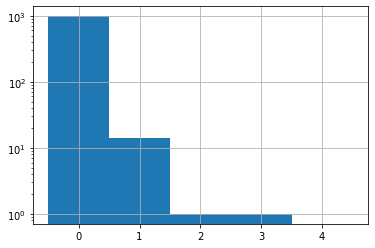

In [8]:
plt.hist(NUV_HD_35um_06p_MT_data.amplitude_pe_detected[0], bins = 5, range = [-0.5, 4.5])
plt.grid()
plt.yscale('log')

In [5]:
def get_waveforms_1px_ac(data, range_points, start = 20, baseline_start = 20, n_skip = 5):
    
    n_waveforms = len(data.amplitude_lsb)
    amplitude_cross_ac = np.zeros(n_waveforms)
    amplitude_1_baseline = np.zeros(n_waveforms)
    
    amplitude_rebins_all = []
    
    for event in range (0 , n_waveforms):
        
        amplitude_rebins = data.amplitude_lsb[event][::n_skip][start:start+range_points]
        
        amplitude_rebins_all.append(amplitude_rebins)
                
        amplitude_1_baseline[event] = np.mean(data.amplitude_lsb[event][::n_skip][baseline_start:baseline_start+range_points])
        amplitude_cross_ac[event] = np.max(amplitude_rebins)

    return amplitude_1_baseline, amplitude_cross_ac, amplitude_rebins_all
        
        

In [6]:
n_points = 20
n_start = 40
baseline_start = 40
n_skip = 5

baseline_25um_10p_data, amplimax_ac_25um_10p_data, wf_25um_10p_data = get_waveforms_1px_ac(NUV_HD_25um_10p_data, range_points = n_points, start = n_start, baseline_start =baseline_start, n_skip = n_skip)
baseline_25um_20p_data, amplimax_ac_25um_20p_data, wf_25um_20p_data = get_waveforms_1px_ac(NUV_HD_25um_20p_data, range_points = n_points, start = n_start, baseline_start =baseline_start, n_skip = n_skip)
baseline_25um_03p_LXT_data, amplimax_ac_25um_03p_LXT_data, wf_25um_03p_LXT_data = get_waveforms_1px_ac(NUV_HD_25um_03p_LXT_data, range_points = n_points, start = n_start, baseline_start =baseline_start, n_skip = n_skip)
baseline_25um_06p_LXT_data, amplimax_ac_25um_06p_LXT_data, wf_25um_06p_LXT_data = get_waveforms_1px_ac(NUV_HD_25um_06p_LXT_data, range_points = n_points, start = n_start, baseline_start =baseline_start, n_skip = n_skip)

In [7]:
baseline_35um_10p_data, amplimax_ac_35um_10p_data, wf_35um_10p_data = get_waveforms_1px_ac(NUV_HD_35um_10p_data, range_points = n_points, start = n_start, baseline_start =baseline_start, n_skip = n_skip)
baseline_35um_20p_data, amplimax_ac_35um_20p_data, wf_35um_20p_data = get_waveforms_1px_ac(NUV_HD_35um_20p_data, range_points = n_points, start = n_start, baseline_start =baseline_start, n_skip = n_skip)
baseline_35um_03p_data, amplimax_ac_35um_03p_data, wf_35um_03p_data = get_waveforms_1px_ac(NUV_HD_35um_03p_data, range_points = n_points, start = n_start, baseline_start =baseline_start, n_skip = n_skip)
baseline_35um_06p_data, amplimax_ac_35um_06p_data, wf_35um_06p_data = get_waveforms_1px_ac(NUV_HD_35um_06p_data, range_points = n_points, start = n_start, baseline_start =baseline_start, n_skip = n_skip)

NameError: name 'NUV_HD_35um_03p_data' is not defined

In [15]:
#baseline_35um_03p_mt_data, amplimax_ac_35um_03p_mt_data, wf_35um_03p_mt_data = get_waveforms_1px_ac(NUV_HD_35um_03p_MT_data, range_points = n_points, start = n_start, baseline_start =baseline_start, n_skip = n_skip)
baseline_35um_06p_mt_data, amplimax_ac_35um_06p_mt_data, wf_35um_06p_mt_data = get_waveforms_1px_ac(NUV_HD_35um_06p_MT_data, range_points = n_points, start = n_start, baseline_start =baseline_start, n_skip = n_skip)

AttributeError: 'NoneType' object has no attribute 'amplitude_lsb'

In [11]:
n_points = 20
n_start_signal = 100
baseline_start = 40
n_skip = 5

baseline_25um_10p_signal, amplimax_ac_25um_10p_signal, wf_25um_10p_signal = get_waveforms_1px_ac(NUV_HD_25um_10p_data, range_points = n_points, start = n_start_signal, baseline_start =baseline_start, n_skip = n_skip)
baseline_25um_20p_signal, amplimax_ac_25um_20p_signal, wf_25um_20p_signal = get_waveforms_1px_ac(NUV_HD_25um_20p_data, range_points = n_points, start = n_start_signal, baseline_start =baseline_start, n_skip = n_skip)
baseline_25um_03p_signal, amplimax_ac_25um_03p_signal, wf_25um_03p_signal = get_waveforms_1px_ac(NUV_HD_25um_03p_data, range_points = n_points, start = n_start_signal, baseline_start =baseline_start, n_skip = n_skip)
baseline_25um_06p_signal, amplimax_ac_25um_06p_signal, wf_25um_06p_signal = get_waveforms_1px_ac(NUV_HD_25um_06p_data, range_points = n_points, start = n_start_signal, baseline_start =baseline_start, n_skip = n_skip)

In [12]:
baseline_35um_10p_signal, amplimax_ac_35um_10p_signal, wf_35um_10p_signal = get_waveforms_1px_ac(NUV_HD_35um_10p_data, range_points = n_points, start = n_start_signal, baseline_start =baseline_start, n_skip = n_skip)
baseline_35um_20p_signal, amplimax_ac_35um_20p_signal, wf_35um_20p_signal = get_waveforms_1px_ac(NUV_HD_35um_20p_data, range_points = n_points, start = n_start_signal, baseline_start =baseline_start, n_skip = n_skip)
baseline_35um_03p_signal, amplimax_ac_35um_03p_signal, wf_35um_03p_signal = get_waveforms_1px_ac(NUV_HD_35um_03p_data, range_points = n_points, start = n_start_signal, baseline_start =baseline_start, n_skip = n_skip)
baseline_35um_06p_signal, amplimax_ac_35um_06p_signal, wf_35um_06p_signal = get_waveforms_1px_ac(NUV_HD_35um_06p_data, range_points = n_points, start = n_start_signal, baseline_start =baseline_start, n_skip = n_skip)

In [13]:
baseline_35um_03p_mt_signal, amplimax_ac_35um_03p_mt_signal, wf_35um_03p_mt_signal = get_waveforms_1px_ac(NUV_HD_35um_03p_MT_data, range_points = n_points, start = n_start_signal, baseline_start =baseline_start, n_skip = n_skip)
baseline_35um_06p_mt_signal, amplimax_ac_35um_06p_mt_signal, wf_35um_06p_mt_signal = get_waveforms_1px_ac(NUV_HD_35um_06p_MT_data, range_points = n_points, start = n_start_signal, baseline_start =baseline_start, n_skip = n_skip)

"\nplt.plot(NUV_HD_25um_20p_data.time, NUV_HD_25um_20p_data.amplitude_lsb[event], '.-')\nplt.plot([NUV_HD_25um_20p_data.time[::n_skip][baseline_start], NUV_HD_25um_20p_data.time[::n_skip][baseline_start+n_points]], [baseline_25um_10p_data[event], baseline_25um_10p_data[event]], 'r')\nplt.plot(NUV_HD_25um_20p_data.time[::n_skip][n_start:n_start+n_points], wf_25um_20p_data[event], '.-')\nplt.plot([NUV_HD_25um_20p_data.time[::n_skip][n_start], NUV_HD_25um_20p_data.time[::n_skip][n_start+n_points]], \n         [amplimax_ac_25um_20p_data[event], amplimax_ac_25um_20p_data[event]], '.-')\n\nplt.grid()\nplt.show()\n\nplt.plot(NUV_HD_25um_03p_data.time, NUV_HD_25um_03p_data.amplitude_lsb[event], '.-')\nplt.plot([NUV_HD_25um_03p_data.time[::n_skip][baseline_start], NUV_HD_25um_03p_data.time[::n_skip][baseline_start+n_points]], [baseline_25um_10p_data[event], baseline_25um_10p_data[event]], 'r')\nplt.plot(NUV_HD_25um_03p_data.time[::n_skip][n_start:n_start+n_points], wf_25um_03p_data[event], '.-'

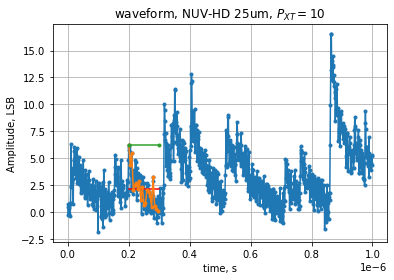

In [12]:
event = 100
plt.plot(NUV_HD_25um_10p_data.time, NUV_HD_25um_10p_data.amplitude_lsb[event], '.-')
plt.plot([NUV_HD_25um_10p_data.time[::n_skip][baseline_start], NUV_HD_25um_10p_data.time[::n_skip][baseline_start+n_points]], [baseline_25um_10p_data[event], baseline_25um_10p_data[event]], 'r')
plt.plot(NUV_HD_25um_10p_data.time[::n_skip][n_start:n_start+n_points], wf_25um_10p_data[event], '.-')
plt.plot([NUV_HD_25um_10p_data.time[::n_skip][n_start], NUV_HD_25um_10p_data.time[::n_skip][n_start+n_points]], 
         [amplimax_ac_25um_10p_data[event], amplimax_ac_25um_10p_data[event]], '.-')

plt.grid()
plt.title('waveform, NUV-HD 25um, $P_{XT} = 10%$')
plt.ylabel('Amplitude, LSB')
plt.xlabel('time, s')

#plt.show()

'''
plt.plot(NUV_HD_25um_20p_data.time, NUV_HD_25um_20p_data.amplitude_lsb[event], '.-')
plt.plot([NUV_HD_25um_20p_data.time[::n_skip][baseline_start], NUV_HD_25um_20p_data.time[::n_skip][baseline_start+n_points]], [baseline_25um_10p_data[event], baseline_25um_10p_data[event]], 'r')
plt.plot(NUV_HD_25um_20p_data.time[::n_skip][n_start:n_start+n_points], wf_25um_20p_data[event], '.-')
plt.plot([NUV_HD_25um_20p_data.time[::n_skip][n_start], NUV_HD_25um_20p_data.time[::n_skip][n_start+n_points]], 
         [amplimax_ac_25um_20p_data[event], amplimax_ac_25um_20p_data[event]], '.-')

plt.grid()
plt.show()

plt.plot(NUV_HD_25um_03p_data.time, NUV_HD_25um_03p_data.amplitude_lsb[event], '.-')
plt.plot([NUV_HD_25um_03p_data.time[::n_skip][baseline_start], NUV_HD_25um_03p_data.time[::n_skip][baseline_start+n_points]], [baseline_25um_10p_data[event], baseline_25um_10p_data[event]], 'r')
plt.plot(NUV_HD_25um_03p_data.time[::n_skip][n_start:n_start+n_points], wf_25um_03p_data[event], '.-')
plt.plot([NUV_HD_25um_03p_data.time[::n_skip][n_start], NUV_HD_25um_03p_data.time[::n_skip][n_start+n_points]], 
         [amplimax_ac_25um_03p_data[event], amplimax_ac_25um_03p_data[event]], '.-')

plt.grid()
plt.show()

plt.plot(NUV_HD_25um_06p_data.time, NUV_HD_25um_06p_data.amplitude_lsb[event], '.-')
plt.plot([NUV_HD_25um_06p_data.time[::n_skip][baseline_start], NUV_HD_25um_06p_data.time[::n_skip][baseline_start+n_points]], [baseline_25um_10p_data[event], baseline_25um_10p_data[event]], 'r')
plt.plot(NUV_HD_25um_06p_data.time[::n_skip][n_start:n_start+n_points], wf_25um_06p_data[event], '.-')
plt.plot([NUV_HD_25um_06p_data.time[::n_skip][n_start], NUV_HD_25um_06p_data.time[::n_skip][n_start+n_points]], 
         [amplimax_ac_25um_06p_data[event], amplimax_ac_25um_06p_data[event]], '.-')

plt.grid()
plt.show()
'''

#plt.xlim(0.15e-6, 0.45e-6)

In [7]:
plt.figure(figsize=(12, 8))

event = 0
plt.plot(NUV_HD_25um_10p_data.time, NUV_HD_25um_10p_data.amplitude_lsb[event], '.-',  label='Simulated waveform')
plt.plot(NUV_HD_25um_10p_data.time[::n_skip][n_start:n_start+n_points], wf_25um_10p_data[event], '.-', label='Analyzed part, resampled (5ns)')
plt.plot([NUV_HD_25um_10p_data.time[::n_skip][baseline_start], NUV_HD_25um_10p_data.time[::n_skip][baseline_start+n_points]], [baseline_25um_10p_data[event], baseline_25um_10p_data[event]], 'r', label='baseline')
plt.plot([NUV_HD_25um_10p_data.time[::n_skip][n_start], NUV_HD_25um_10p_data.time[::n_skip][n_start+n_points]], 
         [amplimax_ac_25um_10p_data[event], amplimax_ac_25um_10p_data[event]], '-', label='max amplitude')


plt.plot(NUV_HD_25um_10p_data.time[::n_skip][n_start_signal:n_start_signal+n_points], wf_25um_10p_signal[event], '.-', label='Analyzed part, resampled (5ns)')
plt.plot([NUV_HD_25um_10p_data.time[::n_skip][n_start_signal], NUV_HD_25um_10p_data.time[::n_skip][n_start_signal+n_points]], 
         [amplimax_ac_25um_10p_signal[event], amplimax_ac_25um_10p_signal[event]], '-', label='max amplitude')

plt.grid()
plt.title('waveform, NUV-HD 25um, $P_{XT} = 10%$', fontsize=18)
plt.ylabel('Amplitude, LSB', fontsize=18)
plt.xlabel('time, s', fontsize=18)
plt.legend(loc = 0, fontsize=14)
#plt.ylim(-2.5, 34)
#plt.xlim(0.15e-6, 0.35e-6)
plt.savefig('waveform_example_zoom_fake.png', dpi = 200)
plt.show()




NameError: name 'NUV_HD_25um_10p_data' is not defined

<Figure size 864x576 with 0 Axes>

In [28]:
NUV_HD_35um_03p_MT_data.amplitude_pe_detected[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [8]:
plt.figure(figsize=(12, 8))

event = 0
plt.plot(NUV_HD_35um_03p_MT_data.time, NUV_HD_35um_03p_MT_data.amplitude_lsb[event], '.-',  label='Simulated waveform')
plt.plot(NUV_HD_35um_03p_MT_data.time[::n_skip][n_start:n_start+n_points], wf_35um_03p_mt_data[event], '.-', label='Analyzed part, resampled (5ns)')
plt.plot([NUV_HD_35um_03p_MT_data.time[::n_skip][baseline_start], NUV_HD_35um_03p_MT_data.time[::n_skip][baseline_start+n_points]], [baseline_35um_03p_mt_data[event], baseline_35um_03p_mt_data[event]], 'r', label='baseline')
plt.plot([NUV_HD_35um_03p_MT_data.time[::n_skip][n_start], NUV_HD_35um_03p_MT_data.time[::n_skip][n_start+n_points]], 
         [amplimax_ac_35um_03p_mt_data[event], amplimax_ac_35um_03p_mt_data[event]], '-', label='max amplitude')


plt.plot(NUV_HD_35um_03p_MT_data.time[::n_skip][n_start_signal:n_start_signal+n_points], wf_35um_03p_mt_signal[event], '.-', label='Analyzed part, resampled (5ns)')
plt.plot([NUV_HD_35um_03p_MT_data.time[::n_skip][n_start_signal], NUV_HD_35um_03p_MT_data.time[::n_skip][n_start_signal+n_points]], 
         [amplimax_ac_35um_03p_mt_signal[event], amplimax_ac_35um_03p_mt_signal[event]], '-', label='max amplitude')

plt.grid()
plt.title('waveform, NUV-HD 25um, $P_{XT} = 10%$', fontsize=18)
plt.ylabel('Amplitude, LSB', fontsize=18)
plt.xlabel('time, s', fontsize=18)
plt.legend(loc = 0, fontsize=14)
#plt.ylim(-2.5, 34)
#plt.xlim(0.15e-6, 0.35e-6)
#plt.savefig('waveform_example_zoom_fake.png', dpi = 200)
plt.show()




NameError: name 'NUV_HD_35um_03p_MT_data' is not defined

<Figure size 864x576 with 0 Axes>

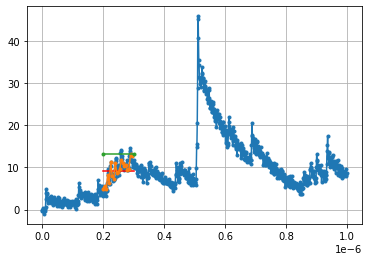

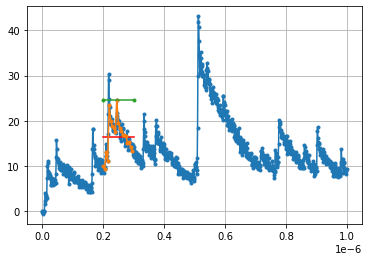

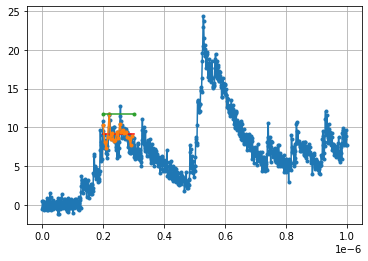

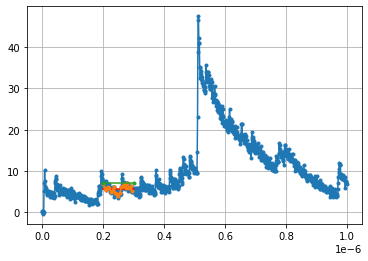

In [17]:
event = 100
plt.plot(NUV_HD_35um_10p_data.time, NUV_HD_35um_10p_data.amplitude_lsb[event], '.-')
plt.plot([NUV_HD_35um_10p_data.time[::n_skip][baseline_start], NUV_HD_35um_10p_data.time[::n_skip][baseline_start+n_points]], [baseline_35um_10p_data[event], baseline_35um_10p_data[event]], 'r')
plt.plot(NUV_HD_35um_10p_data.time[::n_skip][n_start:n_start+n_points], wf_35um_10p_data[event], '.-')
plt.plot([NUV_HD_35um_10p_data.time[::n_skip][n_start], NUV_HD_35um_10p_data.time[::n_skip][n_start+n_points]], 
         [amplimax_ac_35um_10p_data[event], amplimax_ac_35um_10p_data[event]], '.-')

plt.grid()
plt.show()

plt.plot(NUV_HD_35um_20p_data.time, NUV_HD_35um_20p_data.amplitude_lsb[event], '.-')
plt.plot([NUV_HD_35um_20p_data.time[::n_skip][baseline_start], NUV_HD_35um_20p_data.time[::n_skip][baseline_start+n_points]], [baseline_35um_20p_data[event], baseline_35um_20p_data[event]], 'r')
plt.plot(NUV_HD_35um_20p_data.time[::n_skip][n_start:n_start+n_points], wf_35um_20p_data[event], '.-')
plt.plot([NUV_HD_35um_20p_data.time[::n_skip][n_start], NUV_HD_35um_20p_data.time[::n_skip][n_start+n_points]], 
         [amplimax_ac_35um_20p_data[event], amplimax_ac_35um_20p_data[event]], '.-')

plt.grid()
plt.show()

plt.plot(NUV_HD_35um_03p_data.time, NUV_HD_35um_03p_data.amplitude_lsb[event], '.-')
plt.plot([NUV_HD_35um_03p_data.time[::n_skip][baseline_start], NUV_HD_35um_03p_data.time[::n_skip][baseline_start+n_points]], [baseline_35um_10p_data[event], baseline_35um_10p_data[event]], 'r')
plt.plot(NUV_HD_35um_03p_data.time[::n_skip][n_start:n_start+n_points], wf_35um_03p_data[event], '.-')
plt.plot([NUV_HD_35um_03p_data.time[::n_skip][n_start], NUV_HD_35um_03p_data.time[::n_skip][n_start+n_points]], 
         [amplimax_ac_35um_03p_data[event], amplimax_ac_35um_03p_data[event]], '.-')

plt.grid()
plt.show()

plt.plot(NUV_HD_35um_06p_data.time, NUV_HD_35um_06p_data.amplitude_lsb[event], '.-')
plt.plot([NUV_HD_35um_06p_data.time[::n_skip][baseline_start], NUV_HD_35um_06p_data.time[::n_skip][baseline_start+n_points]], [baseline_35um_06p_data[event], baseline_35um_06p_data[event]], 'r')
plt.plot(NUV_HD_35um_06p_data.time[::n_skip][n_start:n_start+n_points], wf_35um_06p_data[event], '.-')
plt.plot([NUV_HD_35um_06p_data.time[::n_skip][n_start], NUV_HD_35um_06p_data.time[::n_skip][n_start+n_points]], 
         [amplimax_ac_35um_06p_data[event], amplimax_ac_35um_06p_data[event]], '.-')

plt.grid()
plt.show()

#plt.xlim(0.15e-6, 0.45e-6)

In [18]:
plt.hist(amplimax_ac_25um_10p_data/n_pe, bins = 50, alpha = 0.9, linewidth=2, histtype='step', label='$P_{XT}$ = 10%')

plt.hist(amplimax_ac_25um_20p_data/n_pe, bins = 50, alpha = 0.9, linewidth=2, histtype='step', label='$P_{XT}$ = 20%')
plt.hist(amplimax_ac_25um_03p_data/n_pe, bins = 50, alpha = 0.9, linewidth=2, histtype='step', label='$P_{XT}$ = 3.3%')
plt.hist(amplimax_ac_25um_06p_data/n_pe, bins = 50, alpha = 0.9, linewidth=2, histtype='step', label='$P_{XT}$ = 6.6%')
plt.yscale('log')
plt.title('NSB, NUV-HD 25um')
plt.ylabel('N events', fontsize=14)
plt.xlabel('Max Amplitude, p.e.', fontsize=14)
plt.grid()
plt.legend(loc = 0, fontsize=14)
plt.savefig('NSB_max_amplitude_dist.png', dpi = 200)

#plt.hist(amplimax_ac_25um_10p_signal/n_pe, bins = 50, alpha = 0.9, linewidth=2, histtype='step', c = 'tab:blue', label='$P_{XT}$ = 10%')

NameError: name 'n_pe' is not defined

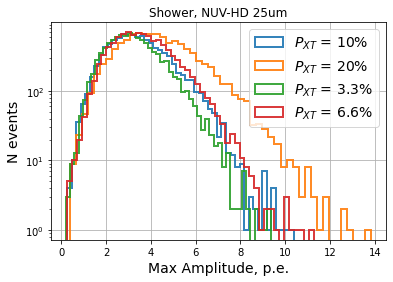

In [45]:
plt.hist(amplimax_ac_25um_10p_signal/n_pe, bins = 50, alpha = 0.9, linewidth=2, histtype='step', label='$P_{XT}$ = 10%')

plt.hist(amplimax_ac_25um_20p_signal/n_pe, bins = 50, alpha = 0.9, linewidth=2, histtype='step', label='$P_{XT}$ = 20%')
plt.hist(amplimax_ac_25um_03p_signal/n_pe, bins = 50, alpha = 0.9, linewidth=2, histtype='step', label='$P_{XT}$ = 3.3%')
plt.hist(amplimax_ac_25um_06p_signal/n_pe, bins = 50, alpha = 0.9, linewidth=2, histtype='step', label='$P_{XT}$ = 6.6%')
plt.yscale('log')
plt.title('Shower, NUV-HD 25um')
plt.ylabel('N events', fontsize=14)
plt.xlabel('Max Amplitude, p.e.', fontsize=14)
plt.grid()
plt.legend(loc = 0, fontsize=14)
plt.savefig('Shower_max_amplitude_dist.png', dpi = 200)

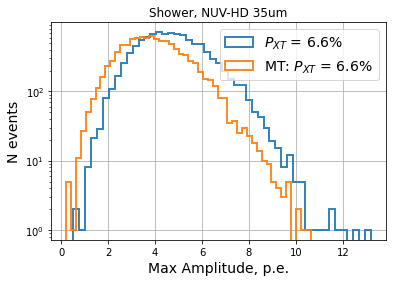

In [22]:
#plt.hist(amplimax_ac_35um_03p_signal/n_pe, bins = 50, alpha = 0.9, linewidth=2, histtype='step', label='$P_{XT}$ = 3.3%')
plt.hist(amplimax_ac_35um_06p_signal/n_pe, bins = 50, alpha = 0.9, linewidth=2, histtype='step', label='$P_{XT}$ = 6.6%')

#plt.hist(amplimax_ac_35um_03p_mt_signal/n_pe, bins = 50, alpha = 0.9, linewidth=2, histtype='step', label='MT: $P_{XT}$ = 3.3%')
plt.hist(amplimax_ac_35um_06p_mt_signal/n_pe, bins = 50, alpha = 0.9, linewidth=2, histtype='step', label='MT: $P_{XT}$ = 6.6%')

plt.yscale('log')
plt.title('Shower, NUV-HD 35um')
plt.ylabel('N events', fontsize=14)
plt.xlabel('Max Amplitude, p.e.', fontsize=14)
plt.grid()
plt.legend(loc = 0, fontsize=14)
#plt.savefig('Shower_max_amplitude_dist.png', dpi = 200)

In [19]:
thresholds = np.arange(0.1, 60., 0.2)
read_out_window_100ns = 100e-9
dead_time = 0e-9

n_pixels = 640
n_pe = 5

NUV_HD_25um_10p_events = []
NUV_HD_25um_20p_events = []
NUV_HD_25um_03p_events = []
NUV_HD_25um_06p_events = []

NUV_HD_35um_10p_events = []
NUV_HD_35um_20p_events = []
NUV_HD_35um_03p_events = []
NUV_HD_35um_06p_events = []

NUV_HD_35um_03p_mt_events = []
NUV_HD_35um_06p_mt_events = []

NUV_HD_25um_10p_events_signal = []
NUV_HD_25um_20p_events_signal = []
NUV_HD_25um_03p_events_signal = []
NUV_HD_25um_06p_events_signal = []

NUV_HD_35um_10p_events_signal = []
NUV_HD_35um_20p_events_signal = []
NUV_HD_35um_03p_events_signal = []
NUV_HD_35um_06p_events_signal = []

NUV_HD_35um_03p_events_mt_signal = []
NUV_HD_35um_06p_events_mt_signal = []

n_pe = 5
x_data = thresholds/n_pe

for i_th in thresholds:
    NUV_HD_25um_10p_events.append( len(amplimax_ac_25um_10p_data[amplimax_ac_25um_10p_data>i_th]) )
    NUV_HD_25um_20p_events.append( len(amplimax_ac_25um_20p_data[amplimax_ac_25um_20p_data>i_th]) )
    NUV_HD_25um_03p_events.append( len(amplimax_ac_25um_03p_data[amplimax_ac_25um_03p_data>i_th]) )
    NUV_HD_25um_06p_events.append( len(amplimax_ac_25um_06p_data[amplimax_ac_25um_06p_data>i_th]) )
    
    
    NUV_HD_35um_10p_events.append( len(amplimax_ac_35um_10p_data[amplimax_ac_35um_10p_data>i_th]) )
    NUV_HD_35um_20p_events.append( len(amplimax_ac_35um_20p_data[amplimax_ac_35um_20p_data>i_th]) )
    NUV_HD_35um_03p_events.append( len(amplimax_ac_35um_03p_data[amplimax_ac_35um_03p_data>i_th]) )
    NUV_HD_35um_06p_events.append( len(amplimax_ac_35um_06p_data[amplimax_ac_35um_06p_data>i_th]) )
    
    NUV_HD_35um_03p_mt_events.append( len(amplimax_ac_35um_03p_mt_data[amplimax_ac_35um_03p_mt_data>i_th]) )
    NUV_HD_35um_06p_mt_events.append( len(amplimax_ac_35um_06p_mt_data[amplimax_ac_35um_06p_mt_data>i_th]) )
    
    NUV_HD_25um_10p_events_signal.append( len(amplimax_ac_25um_10p_signal[amplimax_ac_25um_10p_signal>i_th]) )
    NUV_HD_25um_20p_events_signal.append( len(amplimax_ac_25um_20p_signal[amplimax_ac_25um_20p_signal>i_th]) )
    NUV_HD_25um_03p_events_signal.append( len(amplimax_ac_25um_03p_signal[amplimax_ac_25um_03p_signal>i_th]) )
    NUV_HD_25um_06p_events_signal.append( len(amplimax_ac_25um_06p_signal[amplimax_ac_25um_06p_signal>i_th]) )
    
    
    NUV_HD_35um_10p_events_signal.append( len(amplimax_ac_35um_10p_signal[amplimax_ac_35um_10p_signal>i_th]) )
    NUV_HD_35um_20p_events_signal.append( len(amplimax_ac_35um_20p_signal[amplimax_ac_35um_20p_signal>i_th]) )
    NUV_HD_35um_03p_events_signal.append( len(amplimax_ac_35um_03p_signal[amplimax_ac_35um_03p_signal>i_th]) )
    NUV_HD_35um_06p_events_signal.append( len(amplimax_ac_35um_06p_signal[amplimax_ac_35um_06p_signal>i_th]) )
    
    NUV_HD_35um_03p_events_mt_signal.append( len(amplimax_ac_35um_03p_mt_signal[amplimax_ac_35um_03p_mt_signal>i_th]) )
    NUV_HD_35um_06p_events_mt_signal.append( len(amplimax_ac_35um_06p_mt_signal[amplimax_ac_35um_06p_mt_signal>i_th]) )
    
x_data = thresholds/n_pe


NUV_HD_25um_10p_rate = (n_pixels)*np.array(NUV_HD_25um_10p_events)/(len(amplimax_ac_25um_10p_data)*(read_out_window_100ns+dead_time))
NUV_HD_25um_20p_rate = (n_pixels)*np.array(NUV_HD_25um_20p_events)/(len(amplimax_ac_25um_20p_data)*(read_out_window_100ns+dead_time))
NUV_HD_25um_03p_rate = (n_pixels)*np.array(NUV_HD_25um_03p_events)/(len(amplimax_ac_25um_03p_data)*(read_out_window_100ns+dead_time))
NUV_HD_25um_06p_rate = (n_pixels)*np.array(NUV_HD_25um_06p_events)/(len(amplimax_ac_25um_06p_data)*(read_out_window_100ns+dead_time))

NUV_HD_35um_10p_rate = (n_pixels)*np.array(NUV_HD_35um_10p_events)/(len(amplimax_ac_35um_10p_data)*(read_out_window_100ns+dead_time))
NUV_HD_35um_20p_rate = (n_pixels)*np.array(NUV_HD_35um_20p_events)/(len(amplimax_ac_35um_20p_data)*(read_out_window_100ns+dead_time))
NUV_HD_35um_03p_rate = (n_pixels)*np.array(NUV_HD_35um_03p_events)/(len(amplimax_ac_35um_03p_data)*(read_out_window_100ns+dead_time))
NUV_HD_35um_06p_rate = (n_pixels)*np.array(NUV_HD_35um_06p_events)/(len(amplimax_ac_35um_06p_data)*(read_out_window_100ns+dead_time))

NUV_HD_35um_03p_mt_rate = (n_pixels)*np.array(NUV_HD_35um_03p_mt_events)/(len(amplimax_ac_35um_03p_mt_data)*(read_out_window_100ns+dead_time))
NUV_HD_35um_06p_mt_rate = (n_pixels)*np.array(NUV_HD_35um_06p_mt_events)/(len(amplimax_ac_35um_06p_mt_data)*(read_out_window_100ns+dead_time))


NUV_HD_25um_10p_probability = np.array(NUV_HD_25um_10p_events)/(len(amplimax_ac_25um_10p_data))
NUV_HD_25um_20p_probability = np.array(NUV_HD_25um_20p_events)/(len(amplimax_ac_25um_20p_data))
NUV_HD_25um_03p_probability = np.array(NUV_HD_25um_03p_events)/(len(amplimax_ac_25um_03p_data))
NUV_HD_25um_06p_probability = np.array(NUV_HD_25um_06p_events)/(len(amplimax_ac_25um_06p_data))

NUV_HD_35um_10p_probability = np.array(NUV_HD_35um_10p_events)/(len(amplimax_ac_35um_10p_data))
NUV_HD_35um_20p_probability = np.array(NUV_HD_35um_20p_events)/(len(amplimax_ac_35um_20p_data))
NUV_HD_35um_03p_probability = np.array(NUV_HD_35um_03p_events)/(len(amplimax_ac_35um_03p_data))
NUV_HD_35um_06p_probability = np.array(NUV_HD_35um_06p_events)/(len(amplimax_ac_35um_06p_data))

NUV_HD_35um_03p_mt_probability = np.array(NUV_HD_35um_03p_mt_events)/(len(amplimax_ac_35um_03p_mt_data))
NUV_HD_35um_06p_mt_probability = np.array(NUV_HD_35um_06p_mt_events)/(len(amplimax_ac_35um_06p_mt_data))


NUV_HD_25um_10p_probability_signal = np.array(NUV_HD_25um_10p_events_signal)/(len(amplimax_ac_25um_10p_signal))
NUV_HD_25um_20p_probability_signal = np.array(NUV_HD_25um_20p_events_signal)/(len(amplimax_ac_25um_20p_signal))
NUV_HD_25um_03p_probability_signal = np.array(NUV_HD_25um_03p_events_signal)/(len(amplimax_ac_25um_03p_signal))
NUV_HD_25um_06p_probability_signal = np.array(NUV_HD_25um_06p_events_signal)/(len(amplimax_ac_25um_06p_signal))

NUV_HD_35um_10p_probability_signal = np.array(NUV_HD_35um_10p_events_signal)/(len(amplimax_ac_35um_10p_signal))
NUV_HD_35um_20p_probability_signal = np.array(NUV_HD_35um_20p_events_signal)/(len(amplimax_ac_35um_20p_signal))
NUV_HD_35um_03p_probability_signal = np.array(NUV_HD_35um_03p_events_signal)/(len(amplimax_ac_35um_03p_signal))
NUV_HD_35um_06p_probability_signal = np.array(NUV_HD_35um_06p_events_signal)/(len(amplimax_ac_35um_06p_signal))

NUV_HD_35um_03p_probability_mt_signal = np.array(NUV_HD_35um_03p_events_mt_signal)/(len(amplimax_ac_35um_03p_mt_signal))
NUV_HD_35um_06p_probability_mt_signal = np.array(NUV_HD_35um_06p_events_mt_signal)/(len(amplimax_ac_35um_06p_mt_signal))


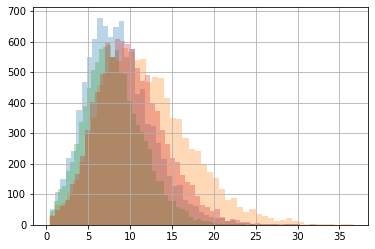

In [20]:
plt.hist(amplimax_ac_35um_10p_data, bins = 50, alpha = 0.3)
plt.hist(amplimax_ac_35um_20p_data, bins = 50, alpha = 0.3)
plt.hist(amplimax_ac_35um_03p_data, bins = 50, alpha = 0.3)
plt.hist(amplimax_ac_35um_06p_data, bins = 50, alpha = 0.3)
plt.grid()

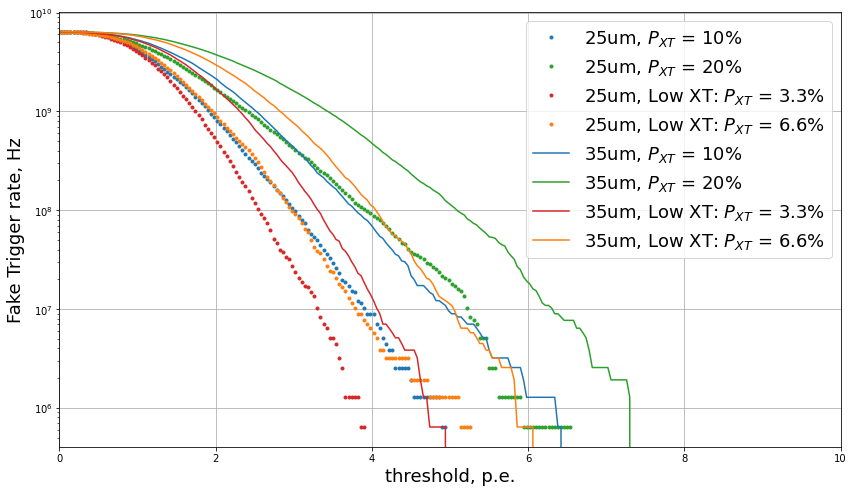

In [21]:
plt.figure(figsize=(14, 8))

plt.plot(x_data, NUV_HD_25um_10p_rate, '.', c = 'tab:blue', label='25um, $P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_25um_20p_rate, '.', c = 'tab:green', label='25um, $P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_25um_03p_rate, '.', c = 'tab:red', label='25um, Low XT: $P_{XT}$ = 3.3%')
plt.plot(x_data, NUV_HD_25um_06p_rate, '.', c = 'tab:orange', label='25um, Low XT: $P_{XT}$ = 6.6%')
#plt.grid()
plt.yscale('log')
#plt.ylim(500.0, 10e9)
plt.xlim(0, 10)
#plt.legend(title = 'Device: ')

#plt.title('NUV-HD 25 um')
#plt.ylabel('Fake Trigger rate, Hz')
#plt.xlabel('threshold, p.e.')

#plt.show()


plt.plot(x_data, NUV_HD_35um_10p_rate, '-', c = 'tab:blue', label='35um, $P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_35um_20p_rate, '-', c = 'tab:green', label='35um, $P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_35um_03p_rate, '-', c = 'tab:red', label='35um, Low XT: $P_{XT}$ = 3.3%')
plt.plot(x_data, NUV_HD_35um_06p_rate, '-', c = 'tab:orange', label='35um, Low XT: $P_{XT}$ = 6.6%')
plt.grid()
plt.yscale('log')
#plt.ylim(500.0, 10e9)
plt.xlim(0, 10)
plt.legend(fontsize=18)

#plt.title('NUV-HD 35 um')
plt.ylabel('Fake Trigger rate, Hz', fontsize=18)
plt.xlabel('threshold, p.e.', fontsize=18)
plt.savefig('Fake_trigger_rate.png', dpi = 200)

Text(0.5, 0, 'threshold, p.e.')

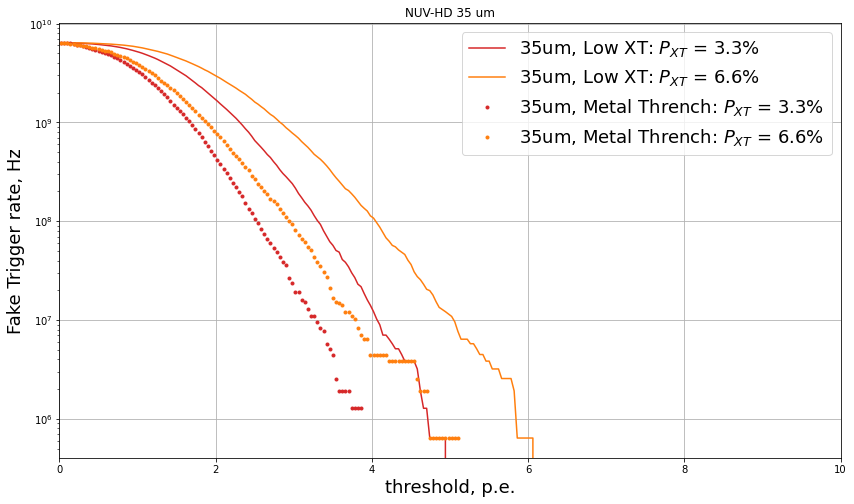

In [29]:
plt.figure(figsize=(14, 8))

#plt.plot(x_data, NUV_HD_35um_10p_rate, '-', c = 'tab:blue', label='35um, $P_{XT}$ = 10%')
#plt.plot(x_data, NUV_HD_35um_20p_rate, '-', c = 'tab:green', label='35um, $P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_35um_03p_rate, '-', c = 'tab:red', label='35um, Low XT: $P_{XT}$ = 3.3%')
plt.plot(x_data, NUV_HD_35um_06p_rate, '-', c = 'tab:orange', label='35um, Low XT: $P_{XT}$ = 6.6%')

plt.plot(x_data, NUV_HD_35um_03p_mt_rate, '.', c = 'tab:red', label='35um, Metal Thrench: $P_{XT}$ = 3.3%')
plt.plot(x_data, NUV_HD_35um_06p_mt_rate, '.', c = 'tab:orange', label='35um, Metal Thrench: $P_{XT}$ = 6.6%')

plt.grid()
plt.yscale('log')
#plt.ylim(500.0, 10e9)
plt.xlim(0, 10)
plt.legend(fontsize=18)

plt.title('NUV-HD 35 um')
plt.ylabel('Fake Trigger rate, Hz', fontsize=18)
plt.xlabel('threshold, p.e.', fontsize=18)
#plt.savefig('Fake_trigger_rate.png', dpi = 200)

(0.0, 10.0)

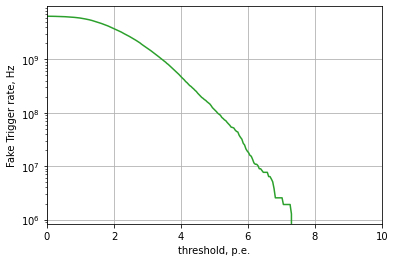

In [137]:
plt.plot(x_data, NUV_HD_35um_20p_rate, '-', c = 'tab:green', label='35um, $P_{XT}$ = 20%')

plt.ylabel('Fake Trigger rate, Hz')
plt.xlabel('threshold, p.e.')
plt.grid()
plt.yscale('log')
#plt.ylim(500.0, 10e9)
plt.xlim(0, 10)

/home/andrii/anaconda3/envs/cta-cnn/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/andrii/anaconda3/envs/cta-cnn/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/andrii/anaconda3/envs/cta-cnn/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/andrii/anaconda3/envs/cta-cnn/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


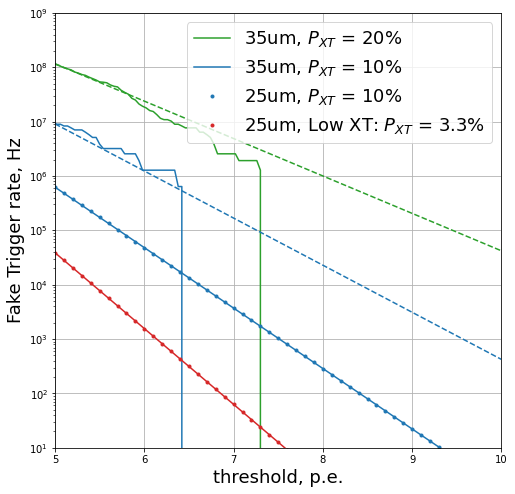

In [268]:
plt.figure(figsize=(8, 8))

a = 12
b = 2
data_x = np.arange(5., 14, 0.1)

plt.plot(x_data, NUV_HD_35um_20p_rate, '-', c = 'tab:green', label='35um, $P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_35um_10p_rate, '-', c = 'tab:blue', label='35um, $P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_25um_10p_rate, '.', c = 'tab:blue', label='25um, $P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_25um_03p_rate, '.', c = 'tab:red', label='25um, Low XT: $P_{XT}$ = 3.3%')

x = x_data[120:-145]
y = NUV_HD_35um_20p_rate[120:-145]
#plt.plot(x, y, '.')
popt, pcov = curve_fit(func_exp, x, y, p0 = [12, 2], maxfev=1000000)
plt.plot(data_x, func_exp(data_x, *popt), '--', c = 'tab:green')

x = x_data[100:-90]
y = NUV_HD_35um_10p_rate[100:-90]

popt_35um_10p_rate, pcov = curve_fit(func_exp, x, y, p0 = [12, 2], maxfev=1000000)
plt.plot(data_x, func_exp(data_x, *popt_35um_10p_rate), '--', c = 'tab:blue')

x = x_data[80:-200]
y = NUV_HD_25um_10p_rate[80:-200]

#plt.plot(x, y, '.r')
data_x_short = np.arange(3., 12, 0.1)
popt_25um_10p_rate, pcov = curve_fit(func_exp, x, y, p0 = [12, 2], maxfev=1000000)
plt.plot(data_x_short, func_exp(data_x_short, *popt_25um_10p_rate), '.-', c = 'tab:blue')


x = x_data[60:-230]
y = NUV_HD_25um_03p_rate[60:-230]

#plt.plot(x, y, '.')
popt_25um_03p_rate, pcov = curve_fit(func_exp, x, y, p0 = [12, 2], maxfev=1000000)
plt.plot(data_x_short, func_exp(data_x_short, *popt_25um_03p_rate), '.-', c = 'tab:red')

plt.grid()
plt.ylim(10.0, 10e8)
plt.xlim(5.0, 10)
plt.yscale('log')
plt.legend(fontsize=18)

plt.ylabel('Fake Trigger rate, Hz', fontsize=18)
plt.xlabel('threshold, p.e.', fontsize=18)
plt.savefig('Fake_trigger_rate_extrapolation.png', dpi = 200)

In [202]:
x_data[-145]

6.2200000000000015

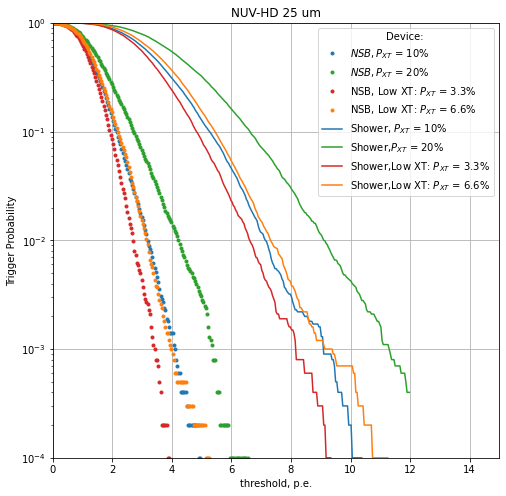

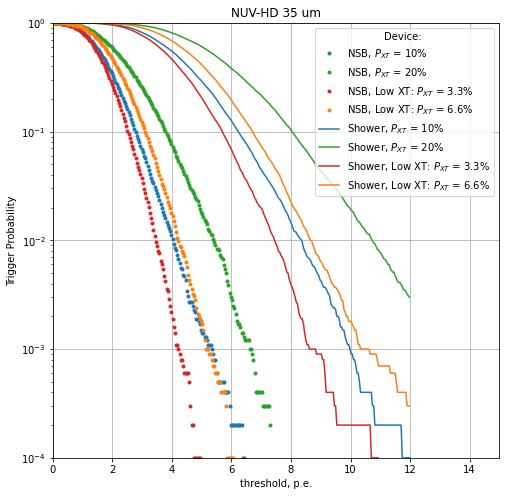

In [35]:
plt.figure(figsize=(8, 8))
plt.plot(x_data, NUV_HD_25um_10p_probability, '.', c = 'tab:blue', label='$NSB, P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_25um_20p_probability, '.', c = 'tab:green', label='$NSB, P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_25um_03p_probability, '.', c = 'tab:red', label='NSB, Low XT: $P_{XT}$ = 3.3%')
plt.plot(x_data, NUV_HD_25um_06p_probability, '.', c = 'tab:orange', label='NSB, Low XT: $P_{XT}$ = 6.6%')

plt.plot(x_data, NUV_HD_25um_10p_probability_signal, '-', c = 'tab:blue', label='Shower, $P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_25um_20p_probability_signal, '-', c = 'tab:green', label='Shower,$P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_25um_03p_probability_signal, '-', c = 'tab:red', label='Shower,Low XT: $P_{XT}$ = 3.3%')
plt.plot(x_data, NUV_HD_25um_06p_probability_signal, '-', c = 'tab:orange', label='Shower,Low XT: $P_{XT}$ = 6.6%')

plt.grid()
plt.yscale('log')
plt.ylim(1e-4, 1)
plt.xlim(0, 15)
plt.legend(title = 'Device: ')

plt.title('NUV-HD 25 um')
plt.ylabel('Trigger Probability')
plt.xlabel('threshold, p.e.')
plt.savefig('fake_trigger_prob_25um.png',dpi = 200)
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(x_data, NUV_HD_35um_10p_probability, '.', c = 'tab:blue', label='NSB, $P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_35um_20p_probability, '.', c = 'tab:green', label='NSB, $P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_35um_03p_probability, '.', c = 'tab:red', label='NSB, Low XT: $P_{XT}$ = 3.3%')
plt.plot(x_data, NUV_HD_35um_06p_probability, '.', c = 'tab:orange', label='NSB, Low XT: $P_{XT}$ = 6.6%')

plt.plot(x_data, NUV_HD_35um_10p_probability_signal, '-', c = 'tab:blue', label='Shower, $P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_35um_20p_probability_signal, '-', c = 'tab:green', label='Shower, $P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_35um_03p_probability_signal, '-', c = 'tab:red', label='Shower, Low XT: $P_{XT}$ = 3.3%')
plt.plot(x_data, NUV_HD_35um_06p_probability_signal, '-', c = 'tab:orange', label='Shower, Low XT: $P_{XT}$ = 6.6%')

plt.grid()
plt.yscale('log')
plt.ylim(1e-4, 1)
plt.xlim(0, 15)
plt.legend(title = 'Device: ')

plt.title('NUV-HD 35 um')
plt.ylabel('Trigger Probability')
plt.xlabel('threshold, p.e.')
plt.savefig('fake_trigger_prob_35um.png',dpi = 200)

Text(0.5, 0, 'threshold, p.e.')

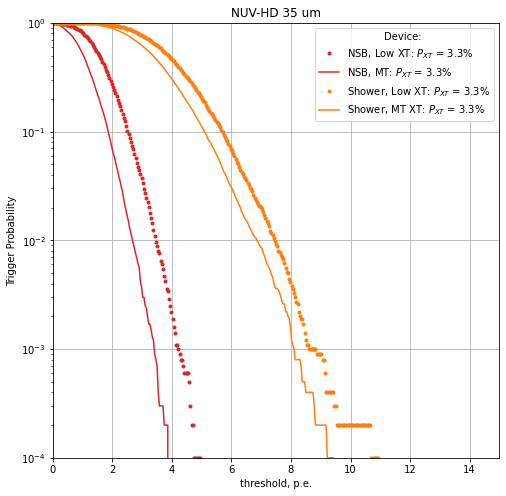

In [42]:
plt.figure(figsize=(8, 8))

plt.plot(x_data, NUV_HD_35um_03p_probability, '.', c = 'tab:red', label='NSB, Low XT: $P_{XT}$ = 3.3%')
#plt.plot(x_data, NUV_HD_35um_06p_probability, 'D', c = 'tab:orange', label='NSB, Low XT: $P_{XT}$ = 6.6%')
plt.plot(x_data, NUV_HD_35um_03p_mt_probability, '-', c = 'tab:red', label='NSB, MT: $P_{XT}$ = 3.3%')
#plt.plot(x_data, NUV_HD_35um_06p_mt_probability, '.-', c = 'tab:orange', label='NSB, Low XT: $P_{XT}$ = 6.6%')

plt.plot(x_data, NUV_HD_35um_03p_probability_signal, '.', c = 'tab:orange', label='Shower, Low XT: $P_{XT}$ = 3.3%')
#plt.plot(x_data, NUV_HD_35um_06p_probability_signal, '-', c = 'tab:orange', label='Shower, Low XT: $P_{XT}$ = 6.6%')

plt.plot(x_data, NUV_HD_35um_03p_probability_mt_signal, '-', c = 'tab:orange', label='Shower, MT XT: $P_{XT}$ = 3.3%')
#plt.plot(x_data, NUV_HD_35um_06p_mt_probability_signal, '-', c = 'tab:orange', label='Shower, Low XT: $P_{XT}$ = 6.6%')

plt.grid()
plt.yscale('log')
plt.ylim(1e-4, 1)
plt.xlim(0, 15)
plt.legend(title = 'Device: ')

plt.title('NUV-HD 35 um')
plt.ylabel('Trigger Probability')
plt.xlabel('threshold, p.e.')

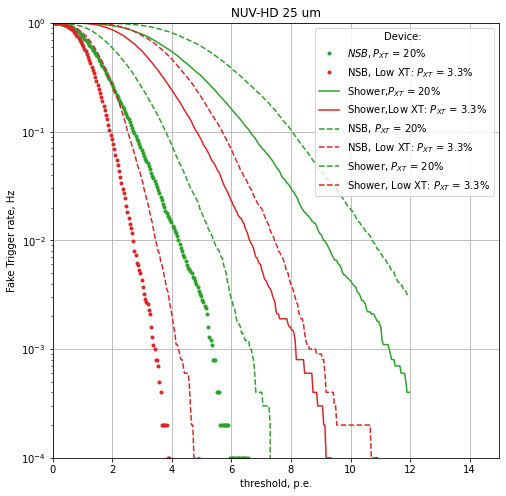

"\nplt.figure(figsize=(8, 8))\nplt.plot(x_data, NUV_HD_35um_10p_probability, '.', c = 'tab:blue', label='NSB, $P_{XT}$ = 10%')\nplt.plot(x_data, NUV_HD_35um_20p_probability, '.', c = 'tab:green', label='NSB, $P_{XT}$ = 20%')\nplt.plot(x_data, NUV_HD_35um_03p_probability, '.', c = 'tab:red', label='NSB, Low XT: $P_{XT}$ = 3.3%')\nplt.plot(x_data, NUV_HD_35um_06p_probability, '.', c = 'tab:orange', label='NSB, Low XT: $P_{XT}$ = 6.6%')\n\nplt.plot(x_data, NUV_HD_35um_10p_probability_signal, '-', c = 'tab:blue', label='Shower, $P_{XT}$ = 10%')\nplt.plot(x_data, NUV_HD_35um_20p_probability_signal, '-', c = 'tab:green', label='Shower, $P_{XT}$ = 20%')\nplt.plot(x_data, NUV_HD_35um_03p_probability_signal, '-', c = 'tab:red', label='Shower, Low XT: $P_{XT}$ = 3.3%')\nplt.plot(x_data, NUV_HD_35um_06p_probability_signal, '-', c = 'tab:orange', label='Shower, Low XT: $P_{XT}$ = 6.6%')\n\nplt.grid()\nplt.yscale('log')\nplt.ylim(1e-4, 1)\nplt.xlim(0, 15)\nplt.legend(title = 'Device: ')\n\nplt.titl

In [228]:
plt.figure(figsize=(8, 8))
#plt.plot(x_data, NUV_HD_25um_10p_probability, '.', c = 'tab:blue', label='$NSB, P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_25um_20p_probability, '.', c = 'tab:green', label='$NSB, P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_25um_03p_probability, '.', c = 'tab:red', label='NSB, Low XT: $P_{XT}$ = 3.3%')
#plt.plot(x_data, NUV_HD_25um_06p_probability, '.', c = 'tab:orange', label='NSB, Low XT: $P_{XT}$ = 6.6%')

#plt.plot(x_data, NUV_HD_25um_10p_probability_signal, '-', c = 'tab:blue', label='Shower, $P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_25um_20p_probability_signal, '-', c = 'tab:green', label='Shower,$P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_25um_03p_probability_signal, '-', c = 'tab:red', label='Shower,Low XT: $P_{XT}$ = 3.3%')
#plt.plot(x_data, NUV_HD_25um_06p_probability_signal, '-', c = 'tab:orange', label='Shower,Low XT: $P_{XT}$ = 6.6%')

plt.grid()
plt.yscale('log')
plt.ylim(1e-4, 1)
plt.xlim(0, 15)
#plt.savefig('fake_trigger_prob_25um.png',dpi = 200)

plt.plot(x_data, NUV_HD_35um_20p_probability, '--', c = 'tab:green', label='NSB, $P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_35um_03p_probability, '--', c = 'tab:red', label='NSB, Low XT: $P_{XT}$ = 3.3%')
plt.plot(x_data, NUV_HD_35um_20p_probability_signal, '--', c = 'tab:green', label='Shower, $P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_35um_03p_probability_signal, '--', c = 'tab:red', label='Shower, Low XT: $P_{XT}$ = 3.3%')

plt.legend(title = 'Device: ')

plt.title('NUV-HD 25 um')
plt.ylabel('Fake Trigger rate, Hz')
plt.xlabel('threshold, p.e.')

plt.show()
'''
plt.figure(figsize=(8, 8))
plt.plot(x_data, NUV_HD_35um_10p_probability, '.', c = 'tab:blue', label='NSB, $P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_35um_20p_probability, '.', c = 'tab:green', label='NSB, $P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_35um_03p_probability, '.', c = 'tab:red', label='NSB, Low XT: $P_{XT}$ = 3.3%')
plt.plot(x_data, NUV_HD_35um_06p_probability, '.', c = 'tab:orange', label='NSB, Low XT: $P_{XT}$ = 6.6%')

plt.plot(x_data, NUV_HD_35um_10p_probability_signal, '-', c = 'tab:blue', label='Shower, $P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_35um_20p_probability_signal, '-', c = 'tab:green', label='Shower, $P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_35um_03p_probability_signal, '-', c = 'tab:red', label='Shower, Low XT: $P_{XT}$ = 3.3%')
plt.plot(x_data, NUV_HD_35um_06p_probability_signal, '-', c = 'tab:orange', label='Shower, Low XT: $P_{XT}$ = 6.6%')

plt.grid()
plt.yscale('log')
plt.ylim(1e-4, 1)
plt.xlim(0, 15)
plt.legend(title = 'Device: ')

plt.title('NUV-HD 35 um')
plt.ylabel('Fake Trigger rate, Hz')
plt.xlabel('threshold, p.e.')
plt.savefig('fake_trigger_prob_35um.png',dpi = 200)
'''

In [58]:
118.110e6/(0.4*24*3600)

3417.5347222222217

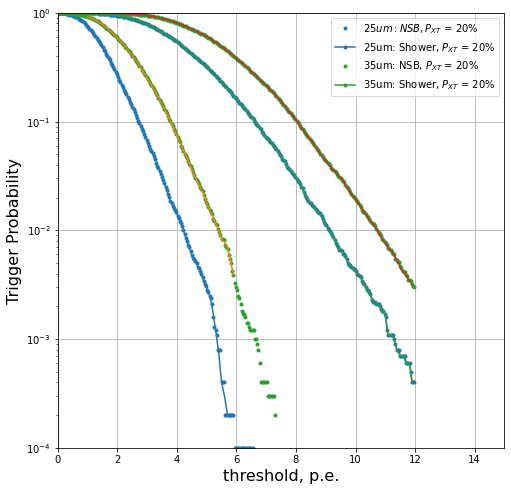

In [36]:
plt.figure(figsize=(8, 8))
plt.plot(x_data, NUV_HD_25um_20p_probability, '.', c = 'tab:blue', label='$25um: NSB, P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_25um_20p_probability_signal, '.-', c = 'tab:blue', label='25um: Shower, $P_{XT}$ = 20%')

plt.grid()
plt.yscale('log')
plt.ylim(1e-4, 1)
plt.xlim(0, 15)


plt.plot(x_data, NUV_HD_35um_20p_probability, '.', c = 'tab:green', label='35um: NSB, $P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_35um_20p_probability_signal, '.-', c = 'tab:green', label='35um: Shower, $P_{XT}$ = 20%')

x_nsb = np.arange(1,6., 0.1)
f25_nsb = interp1d(x_data, NUV_HD_25um_20p_probability, kind='cubic')
f35_nsb = interp1d(x_data, NUV_HD_35um_20p_probability, kind='cubic')

plt.plot(x_nsb, f25_nsb(x_nsb))
plt.plot(x_nsb, f35_nsb(x_nsb))

x_signal = np.arange(2,12, 0.1)
f25_signal = interp1d(x_data, NUV_HD_25um_20p_probability_signal, kind='cubic')
f35_signal = interp1d(x_data, NUV_HD_35um_20p_probability_signal, kind='cubic')

plt.plot(x_signal, f25_signal(x_signal))
plt.plot(x_signal, f35_signal(x_signal))

plt.legend()

plt.ylabel('Trigger Probability', fontsize=16)
plt.xlabel('threshold, p.e.', fontsize=16)
plt.savefig("25um_35um_p20.png", dpi = 200)
plt.show()


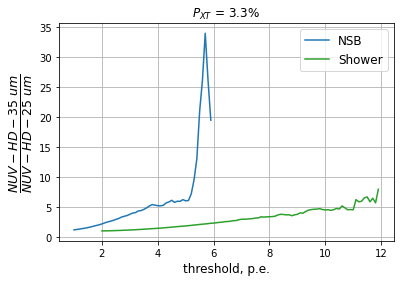

In [37]:
plt.plot(x_nsb, f35_nsb(x_nsb)/f25_nsb(x_nsb), label='NSB')
plt.plot(x_signal, f35_signal(x_signal)/f25_signal(x_signal), c = 'tab:green', label='Shower')
plt.grid()
plt.title('$P_{XT}$ = 3.3%', fontsize=12)
plt.ylabel(r'$\frac{NUV-HD-35 \ um}{NUV-HD-25 \ um}$', fontsize=18)
plt.xlabel('threshold, p.e.', fontsize=12)
plt.legend(fontsize=12)
#plt.savefig("25um_35um_p03_results.png", dpi = 200)

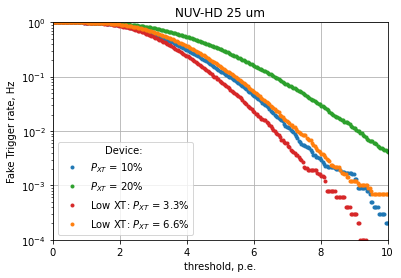

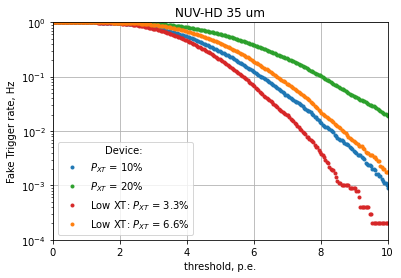

In [112]:
plt.plot(x_data, NUV_HD_25um_10p_probability_signal, '.', c = 'tab:blue', label='$P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_25um_20p_probability_signal, '.', c = 'tab:green', label='$P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_25um_03p_probability_signal, '.', c = 'tab:red', label='Low XT: $P_{XT}$ = 3.3%')
plt.plot(x_data, NUV_HD_25um_06p_probability_signal, '.', c = 'tab:orange', label='Low XT: $P_{XT}$ = 6.6%')
plt.grid()
plt.yscale('log')
plt.ylim(1e-4, 1)
plt.xlim(0, 10)
plt.legend(title = 'Device: ')

plt.title('NUV-HD 25 um')
plt.ylabel('Fake Trigger rate, Hz')
plt.xlabel('threshold, p.e.')
plt.savefig('fake_trigger_prob_25um.png',dpi = 200)
plt.show()


plt.plot(x_data, NUV_HD_35um_10p_probability_signal, '.', c = 'tab:blue', label='$P_{XT}$ = 10%')
plt.plot(x_data, NUV_HD_35um_20p_probability_signal, '.', c = 'tab:green', label='$P_{XT}$ = 20%')
plt.plot(x_data, NUV_HD_35um_03p_probability_signal, '.', c = 'tab:red', label='Low XT: $P_{XT}$ = 3.3%')
plt.plot(x_data, NUV_HD_35um_06p_probability_signal, '.', c = 'tab:orange', label='Low XT: $P_{XT}$ = 6.6%')
plt.grid()
plt.yscale('log')
plt.ylim(1e-4, 1)
plt.xlim(0, 10)
plt.legend(title = 'Device: ')

plt.title('NUV-HD 35 um')
plt.ylabel('Fake Trigger rate, Hz')
plt.xlabel('threshold, p.e.')
plt.savefig('fake_trigger_prob_35um.png',dpi = 200)

In [38]:
import math

28.269/math.pi

8.998302172529579

Text(0.5, 0, 'threshold, p.e.')

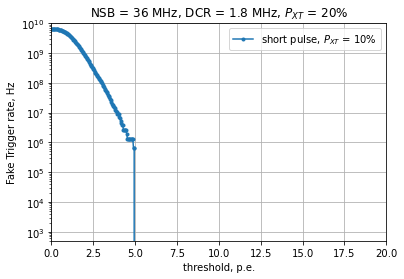

In [168]:
from scipy.interpolate import interp1d

read_out_window_100ns = 100e-9
dead_time = 0e-9

n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_100ns_1px_short = (n_pixels)*np.array(NUV_HD_25um_10p_events)/(len(amplimax_ac_25um_10p_data)*(read_out_window_100ns+dead_time))
y_data_ac_100ns_1px_short = (n_pixels)*np.array(NUV_HD_25um_10p_events)/(len(amplimax_ac_25um_10p_data)*(read_out_window_100ns+dead_time))


plt.plot(x_data, y_data_ac_100ns_1px_short, c = 'tab:blue', marker = '.', label='short pulse, $P_{XT}$ = 10%')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 10e9)
plt.xlim(0, 20)
plt.legend()

plt.title('NSB = 36 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Fake Trigger rate, Hz')
plt.xlabel('threshold, p.e.')

In [138]:
def func_exp(x, a, b):
    return np.exp(-b*(x) + a)


In [139]:
a = 12
b = 2

plt.plot(x_data, y_data_ac_100ns_1px_short)
plt.plot(x_data[45:-45], y_data_ac_100ns_1px_short[45:-45], c = 'tab:blue', marker = '.', label='short pulse, $P_{XT}$ = 10%')

x = x_data[70:-50]
y = y_data_ac_100ns_1px_short[70:-50]

plt.plot(x, y, '.r')

popt, pcov = curve_fit(func_exp, x, y, p0 = [12, 2], maxfev=1000000)


data_x = np.arange(2., 10, 0.1)
plt.plot(data_x, func_exp(data_x, *popt), '--r')
plt.grid()
plt.yscale('log')

NameError: name 'y_data_ac_100ns_1px_short' is not defined

In [146]:
func_exp(5, *popt)

1473793.6793616973

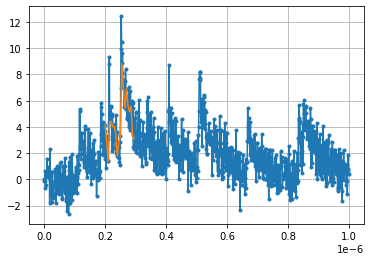

In [133]:
event = 100
plt.plot(NUV_HD_25um_10p_data.time, NUV_HD_25um_10p_data.amplitude_lsb[event], '.-')
plt.plot(NUV_HD_25um_10p_data.time[::5][40:60], NUV_HD_25um_10p_data.amplitude_lsb[event][::5][40:60], '-')
plt.grid()

In [ ]:
def get_waveforms_1px_ac(data, range_points, start = 20):

    n_points = 0
    increment = 0
    amplitude = []
    window = 20
    amplitude_cross = []
    amplitude_cross_ac = []
    
    n_intervals = 0
    
    
    amplitude_arg_max = []
    amplitude_max_ac = []
    amplitude_max = []
    baseline = []
    pulse_amplitude = []
    
    if file1.find('.root') != -1:
        f1 = root.TFile(file1)
        myTree1 = f1.Get("T")
        
        for entry_num in range (0 , myTree1.GetEntries ()):
        #for entry_num in range (0 , 1000):
            myTree1.GetEntry(entry_num)
            
            if entry_num == 0:
                increment = myTree1.dt
                n_points = myTree1.NPoints
                v1_bias = myTree1.Vbias
                
            
            amplitude_1 = -1.* np.array(list(myTree1.V1)[start:start+range_points])
            amplitude_1_baseline = np.mean(-1.* np.array(list(myTree1.V1)[20:20+range_points]))
            
            amplitude_cross_1_ac = np.max(amplitude_1 - amplitude_1_baseline)
            amplitude_cross_ac.append(amplitude_cross_1_ac)
            
        
    else:
        print('incorrect file')
        
    return np.array(amplitude_cross_ac)

In [12]:
NUV_HD_25um_10p_data = load_object('/run/media/andrii/SENSE/sim_results/25um/NUVHD-25um_px_0.1_waveforms_data.pickle')
NUV_HD_25um_20p_data = load_object('/run/media/andrii/SENSE/sim_results/25um/NUVHD-25um_px_0.2_waveforms_data.pickle') 
NUV_HD_25um_033p_data = load_object('/run/media/andrii/SENSE/sim_results/25um/NUVHD-25um_px_0.033_waveforms_data.pickle') 
NUV_HD_25um_066p_data = load_object('/run/media/andrii/SENSE/sim_results/25um/NUVHD-25um_px_0.066_waveforms_data.pickle') 

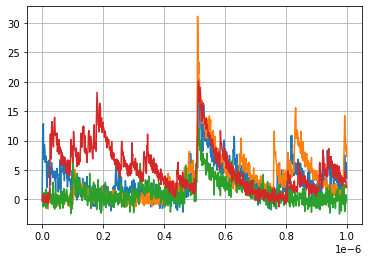

In [18]:
plt.plot(NUV_HD_25um_10p_data.time, NUV_HD_25um_10p_data.amplitude_lsb[0], '-')
plt.plot(NUV_HD_25um_20p_data.time, NUV_HD_25um_20p_data.amplitude_lsb[0], '-')
plt.plot(NUV_HD_25um_033p_data.time, NUV_HD_25um_033p_data.amplitude_lsb[0], '-')
plt.plot(NUV_HD_25um_066p_data.time, NUV_HD_25um_066p_data.amplitude_lsb[0], '-')
#plt.plot(NUV_HD_25um_10p_data.time, NUV_HD_25um_10p_data.amplitude_lsb_nonoise[0], '.')
plt.grid()
plt.show()

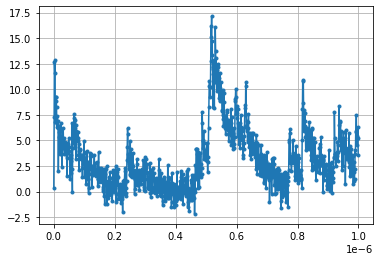

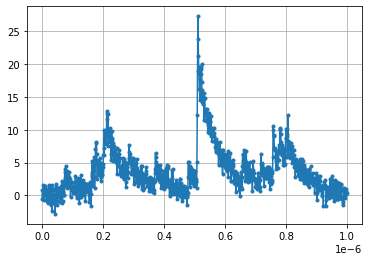

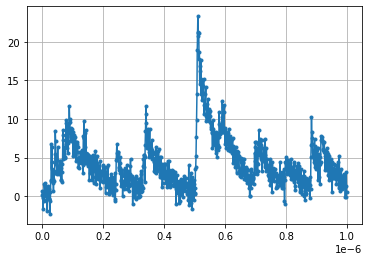

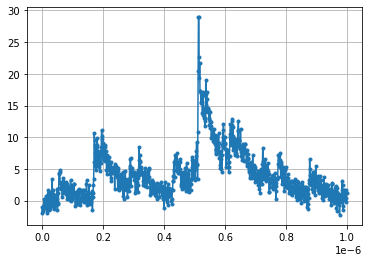

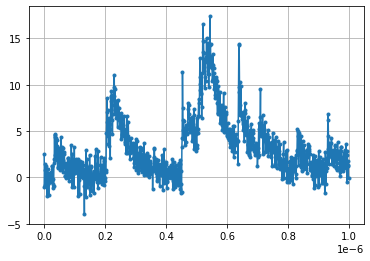

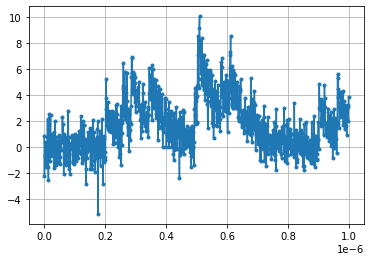

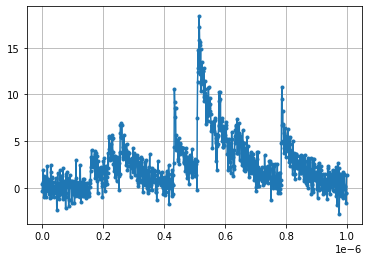

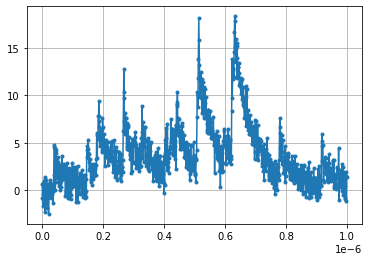

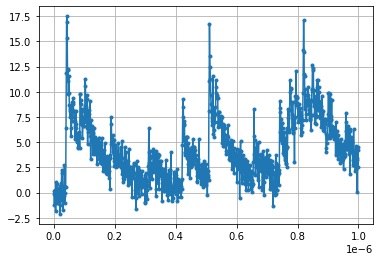

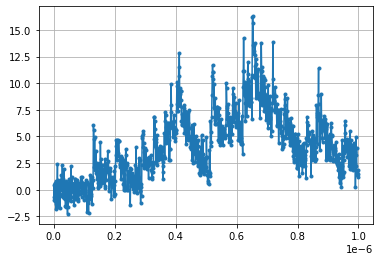

In [11]:
for i in range(10):
    plt.plot(NUV_HD_25um_10p_data.time, NUV_HD_25um_10p_data.amplitude_lsb[i], '.-')
    plt.grid()
    plt.show()


In [25]:
len(NUV_HD_25um_10p_data.amplitude_lsb[i][::5])

200

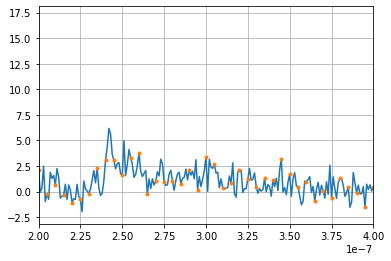

In [30]:
plt.plot(NUV_HD_25um_10p_data.time, NUV_HD_25um_10p_data.amplitude_lsb[0], '-')
plt.plot(NUV_HD_25um_10p_data.time[::5], NUV_HD_25um_10p_data.amplitude_lsb[0][::5], '.')
plt.xlim(0.2e-6, 0.4e-6)
plt.grid()